***Importing Required Packages***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Loading the first dataset***

In [ ]:
df=pd.read_csv("/content/takehome_users.csv",encoding='ISO-8859-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df.shape

(12000, 10)

***Loading the second Dataset***

In [ ]:
df1=pd.read_csv("/content/takehome_user_engagement.csv")
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
df1.shape

(207917, 3)

***Renaming the object_id as user_id***

In [ ]:
df.rename(columns={'object_id':'user_id'},inplace=True)

***Merging the data frames***

In [ ]:
data= pd.merge(df,df1,on='user_id',how='right')

In [ ]:
data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

***Creating the week,year and month column from time_stamp column***

In [ ]:
data['date'] = data['time_stamp'].astype('datetime64')
data['week'] = data['date'].dt.isocalendar().week
data['year'] = data['date'].dt.isocalendar().year
data['month'] =data['date'].dt.month

***Final data frame***

In [ ]:
data.head(3)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1,2013-11-29 03:45:04,48,2013,11


***Calculating the number of times visited based on the week,month and year columns***

In [ ]:
groupby_week = data.groupby(['user_id','week','month','year'])['visited'].count().reset_index()
groupby_week.head(3)

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1


***Extracting the count of rows morethan 3 times visited***

In [ ]:
adopted_user = groupby_week.loc[groupby_week['visited'] >=3]
len(adopted_user)

32754

***Replacing 1 and 0 based on the visited***

In [ ]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x: 1 if x >= 3 else 0)
groupby_week.head(3)

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0


***Count of visited more than 3 times based on week,month and year***

In [ ]:
df2 = groupby_week[(groupby_week['visited']>=3)].value_counts()
df2

user_id  week  month  year  visited  adopted_user
2        6     2      2014  3        1               1
7926     10    3      2014  7        1               1
         19    5      2014  4        1               1
                      2013  5        1               1
         18    5      2014  4        1               1
                                                    ..
4022     1     1      2013  6        1               1
4019     52    12     2013  7        1               1
                      2012  6        1               1
         51    12     2013  7        1               1
11988    21    5      2014  5        1               1
Length: 32754, dtype: int64

In [ ]:
data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited', 'date', 'week', 'year', 'month'],
      dtype='object')

***Checking data types***

In [ ]:
data.dtypes

user_id                                int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                            object
visited                                int64
date                          datetime64[ns]
week                                  UInt32
year                                  UInt32
month                                  int64
dtype: object

***count of opted_in_to_mailing_list in each class***

In [ ]:
data["opted_in_to_mailing_list"].value_counts()

0    154246
1     53671
Name: opted_in_to_mailing_list, dtype: int64

#**Exploratory Data Analysis**

***Univariate Analysis - Finding categories in Creaton_source column***

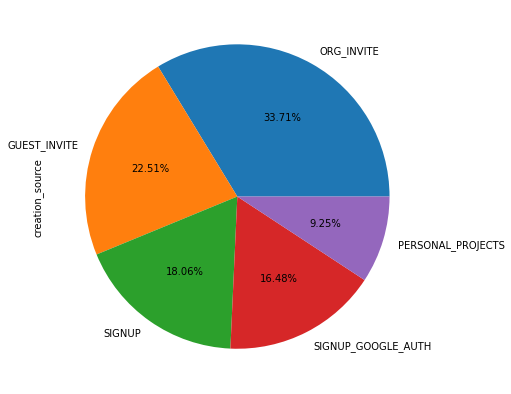

In [ ]:
data["creation_source"].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,7))

**conclusion:**
From above plot; ORG_INVITE column is contributing more compared to other categories.

**Relation between two categorical columns**

***Creation_source vs Opted_in_to_mailing_list***

opted_in_to_mailing_list     0     1
creation_source                     
GUEST_INVITE              2742   875
ORG_INVITE                3226  1115
PERSONAL_PROJECTS          305    99
SIGNUP                    1701   582
SIGNUP_GOOGLE_AUTH        1032   323


Text(0, 0.5, 'opted_in_to_mailing_list')

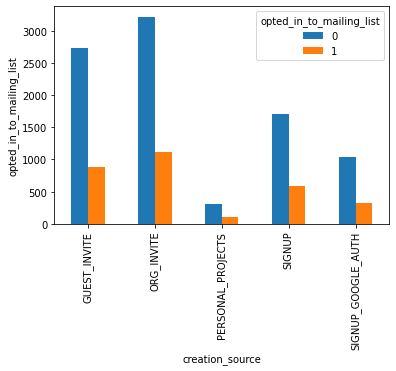

In [ ]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],df["opted_in_to_mailing_list"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("opted_in_to_mailing_list")

**Conclusion:**
Most of the members from ORG_INVITE are opted_in_to_mailing list followed by GUEST_INVITE.
PERSONAL_PROJECTS have very less contibrution.

***Creation_source vs enables_for_marketing_drip***

enabled_for_marketing_drip     0    1
creation_source                      
GUEST_INVITE                3079  538
ORG_INVITE                  3675  666
PERSONAL_PROJECTS            338   66
SIGNUP                      1948  335
SIGNUP_GOOGLE_AUTH          1168  187


Text(0, 0.5, 'enabled_for_marketing_drip')

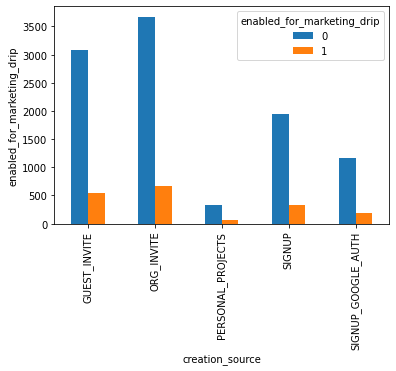

In [ ]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],df["enabled_for_marketing_drip"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("enabled_for_marketing_drip")

**Conclusion:**
Compared to opted_in_to_mailng_list, enabled_for_marketing_drip is less contribution towards all categories in creation_source.

ORG_INVITE category only contributing more based on the advertisements.

***Creation_source vs adopted_user***

adopted_user            0      1
creation_source                 
GUEST_INVITE         9691   6797
ORG_INVITE          14607  11421
PERSONAL_PROJECTS    3679   2629
SIGNUP               9286   7099
SIGNUP_GOOGLE_AUTH   5916   4808


Text(0, 0.5, 'adopted_user')

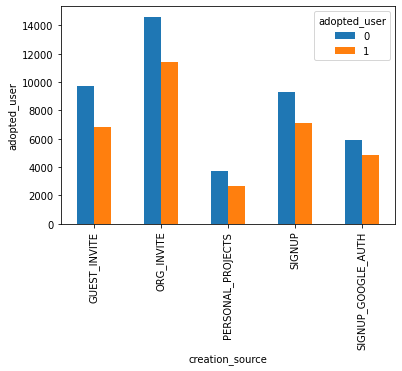

In [ ]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],groupby_week['adopted_user'])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("adopted_user")

**Conclusion:**
In creation_source, all categories, adopted and not adopted are uniformly distributed.

The maximum adopted users are 11421 from ORG_INVITE.

**Relation between one categorical and one numarial columns**

***week vs adopted_user***

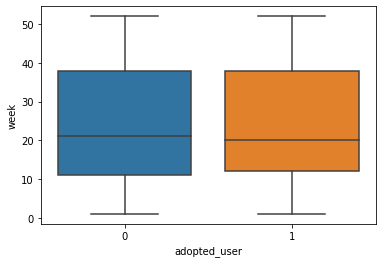

In [ ]:
week_0=groupby_week[groupby_week['adopted_user']==0]["week"]
week_1=groupby_week[groupby_week['adopted_user']==1]["week"]
sns.boxplot(x='adopted_user',y="week",data=groupby_week)
plt.show()

**conclusion:**
The adopted users are mostly from week 11 to week 35.

***adopted_user vs year***

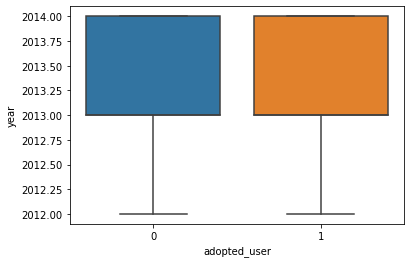

In [ ]:
year_0=groupby_week[groupby_week['adopted_user']==0]["year"]
year_1=groupby_week[groupby_week['adopted_user']==1]["year"]
sns.boxplot(x='adopted_user',y="year",data=groupby_week)
plt.show()


**Conclusion:**
Most of the adopted_users in between 2013 and 2014.

***Monthly wise adopting users***

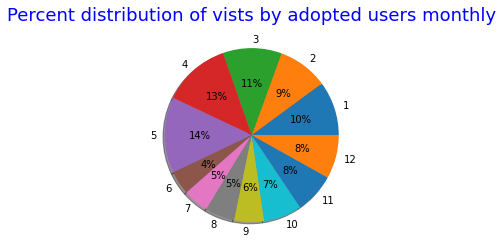

In [ ]:
q = df2.groupby(['month']).size().values
p = df2.groupby(['month']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users monthly", color = 'b',fontsize=18)
plt.show()

**Conclusion:**
The most adopted_users from 5th month.


**Year wise adopted_users**

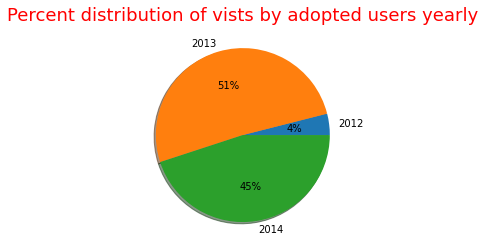

In [ ]:
q = df2.groupby(['year']).size().values
p = df2.groupby(['year']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Percent distribution of vists by adopted users yearly", color = 'r',fontsize=18)
plt.show()

**Conclusion:**
The most adopted users belonging to 2013 year.

**Multivariate analysis**

***Number of times Visited based on group of columns***

Text(0.5, 1.0, 'Number of times visited based on the week,month and year')

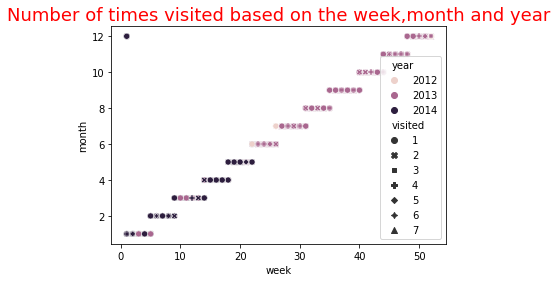

In [ ]:
sns.scatterplot(groupby_week['week'],groupby_week['month'],groupby_week['year'],groupby_week['visited'])
plt.title("Number of times visited based on the week,month and year", color = 'r',fontsize=18)

**Conclusion:**
Most of the members visited in 2013,after 20 weeks.

***Adopted_users based on the grouup of columns***

Text(0.5, 1.0, 'Finding adopted_user based on the year,month and week')

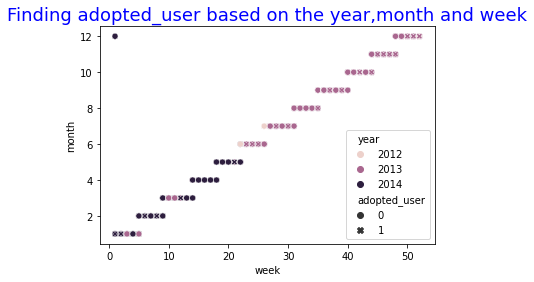

In [ ]:
sns.scatterplot(groupby_week['week'],groupby_week['month'],groupby_week['year'],groupby_week['adopted_user'])
plt.title("Finding adopted_user based on the year,month and week", color = 'b',fontsize=18)

**Conclusion:**
The adopted_users are mostly from 2013 year and 6th,11th and 12th months.

**IMPORTANT FACTORS** 

1.CREATION SOURCE

2.OPTED INTO MAILING LIST

3.ENABLED FOR MARKITING DRIP

4.VISITED 